In [113]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Definición de funciones

In [114]:
def features_test(value,feature,confidence):
    """Función que genera una prueba ANOVA para "value" con caracteristicas "feature" y confianza "confidence"""
    houses_test = houses[[value,feature]]
    formula = f'{value} ~ C({feature})' 
    model = ols(formula, data = houses_test).fit()
    anova_table = sm.stats.anova_lm(model, typ =2)
    p_value = anova_table['PR(>F)'][0]
    
    #Grafica las medias de precio d evnta por caracteristica
    sns.set(context = 'paper', style = 'darkgrid', rc={'figure.figsize':(10, 5)})
    ax = sns.barplot(x = houses_test[feature], y = houses_test[value])
    ax.set_xlabel(feature, fontsize = 12)
    ax.set_ylabel(value, fontsize = 12)
    plt.show()
    
    
    # Regresa un 1 si se rechaza la hipótesis nula y 0 si se acepta
    if p_value < confidence:
        print(f'Dado que se tiene un p-value de {p_value}, se rechaza la hipótesis nula con {(1-confidence)*100}% de confianza, concluyendo que {value} difiere por {feature}')
        return 1
    else:
        return 0

In [115]:
# Carga del dataset
houses = pd.read_csv('train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
# Elimina la columna id
houses = houses.drop('Id',axis=1)
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
# Revisión del tamaño del dataset
houses.shape

(1460, 80)

In [118]:
# Detalle de las columnas
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Revisión de nulos

In [119]:
# Asigna los valores a un diccionario
nulos = houses.isnull().sum().to_dict()

# Filtra sólo las variables que tienen nulos
dict(filter(lambda x: x[1] > 0, nulos.items()))

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [120]:
# Elimina las columnas con mayor número de nulos
houses = houses.drop(['MiscFeature','PoolQC','Alley','Fence'], axis=1)

In [121]:
# Verifica que ya no estén las columnas eliminadas 
houses.shape

(1460, 76)

In [122]:
# Lotfrontage debería ser cero, no Na.
houses = houses.fillna({'LotFrontage':0})

In [123]:
# MasVnrType puede ser None si MasVnrArea es cero
houses[houses['MasVnrType'].isnull()]['MasVnrArea']

#Como son NaN, se corrige MasVnrArea
houses = houses.fillna({'MasVnrArea':0})

In [124]:
# Revisando el detalle, es correcto que 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', si TotalBsmtSF es cero
houses[houses['BsmtQual'].isnull()]['TotalBsmtSF'].value_counts()

0    37
Name: TotalBsmtSF, dtype: int64

In [125]:
# El nulo en eléctrico sí se elimina, ya que no es posible tener todos los servicios en Utilities y no un servicio electrico determinado.
houses = houses.drop(index = houses[houses['Electrical'].isnull()].index[0], axis=0)

In [126]:
# Validar que Fireplaces sea 0 para todos los FireplaceQu nulos, si sí también se pueden quedar.
houses[houses['FireplaceQu'].isnull()]['Fireplaces'].value_counts()

0    689
Name: Fireplaces, dtype: int64

In [127]:
# es correcto que 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond', si GarageCars y 
# GarageArea son cero.
houses[houses['GarageType'].isnull()]['GarageArea'].value_counts()

#Sin embargo, dado que GarageYrBlt es una variable númerica que podría ocasionar problemas, estos registros se llenarán con cero.
houses = houses.fillna({'GarageYrBlt':0})

In [128]:
# Reseteo de index en la base limpia
houses = houses.reset_index(drop=True)

Tratamiento de datos atípicos

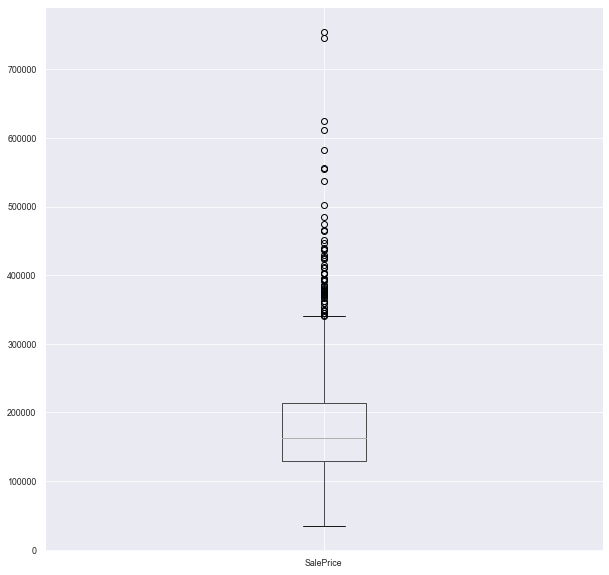

In [129]:
# Vemos si existen datos atipicos
plt.figure(figsize=(10, 10))
houses.boxplot(column='SalePrice')
plt.show()

In [130]:
# Para descartar casos atípicos de acuerdo al criterio del rango intercuartil primero calculamos el IQR y los whiskers superior e inferior
describe = houses.describe().T
describe['IQR'] = describe['75%'] - describe['25%']
describe['Upper_W'] = describe['75%']  + 1.5 * describe['IQR']
describe['Lower_W'] = describe['25%']  - 1.5 * describe['IQR']

# Valida la salida para la columna de precio de venta y asigna los resultados en variables
describe.loc['SalePrice',:]
Upper_W = describe.loc['SalePrice','Upper_W']
Lower_W = describe.loc['SalePrice','Lower_W']

In [131]:
# Luego, se filtra el dataset para quedarnos con los datos que estén dentro de los límites
houses = houses[(houses['SalePrice'] >= Lower_W)&(houses['SalePrice'] <= Upper_W)]
houses.shape

(1398, 76)

**Relaciones entre el precio de venta y otras caracteristicas**

Para validar las caracteristicas que influyen en el precio de venta, genero algunas pruebas de hipótesis para definir si son significativas.

In [132]:
# Genera un dataset con las caracteristicas del dataset
features = houses.select_dtypes('object').columns
features.shape

(39,)

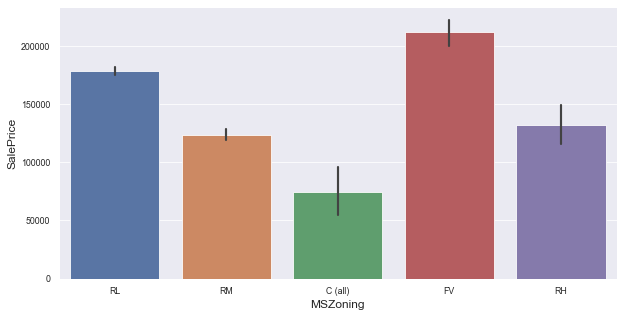

Dado que se tiene un p-value de 1.7168016703862895e-50, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por MSZoning


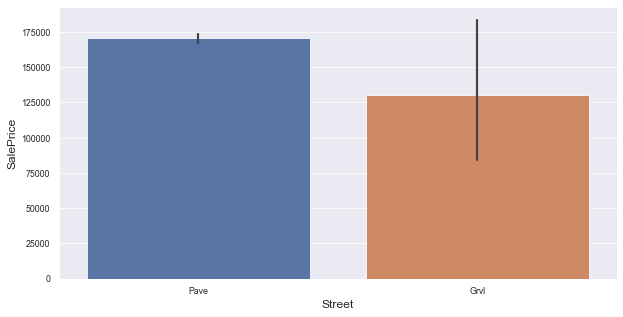

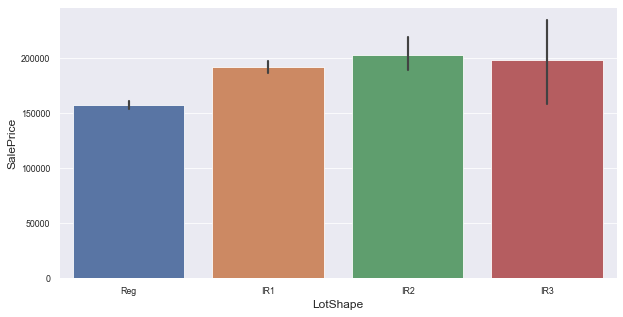

Dado que se tiene un p-value de 5.195803777209785e-26, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por LotShape


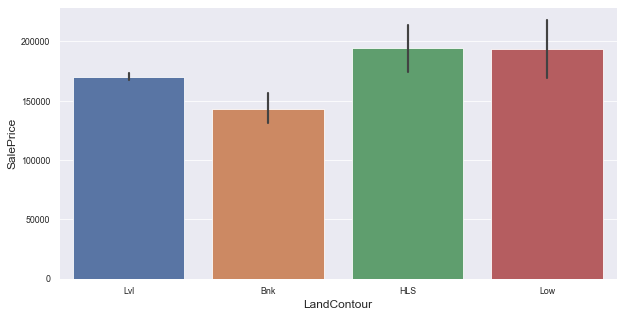

Dado que se tiene un p-value de 1.4983133226899523e-05, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por LandContour


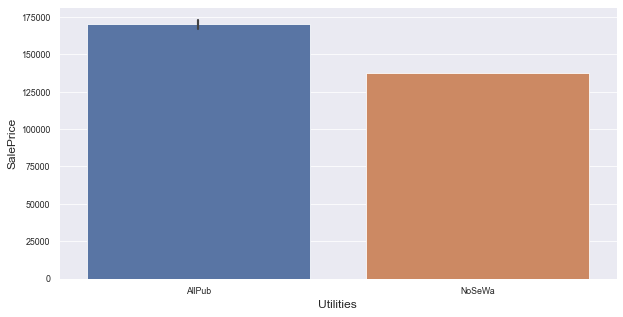

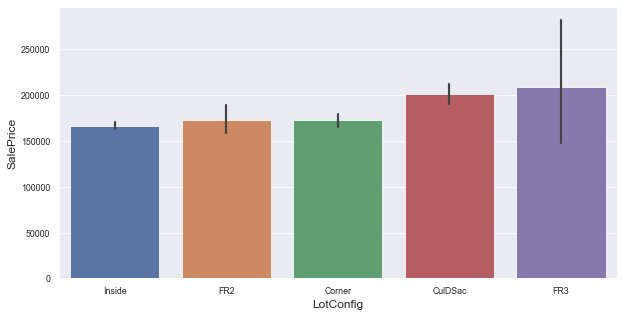

Dado que se tiene un p-value de 5.620627610762348e-06, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por LotConfig


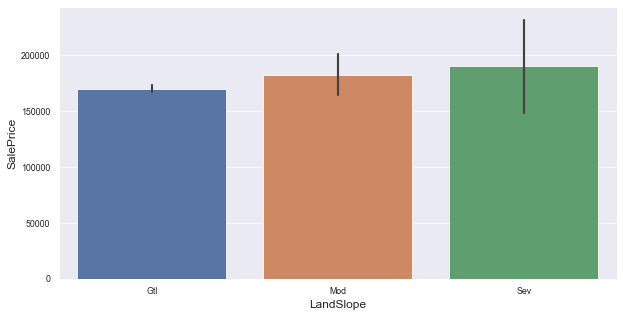

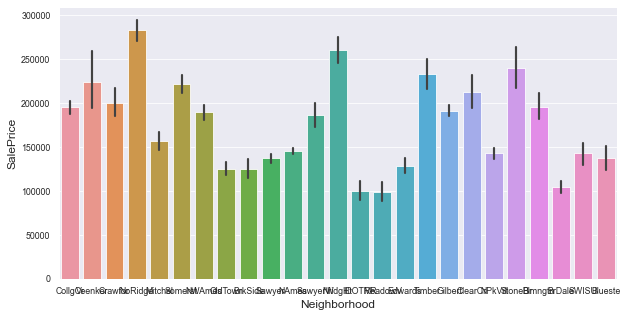

Dado que se tiene un p-value de 6.0247974361512316e-210, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Neighborhood


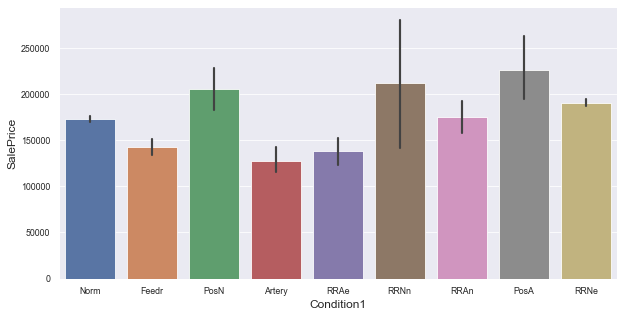

Dado que se tiene un p-value de 4.712392074395257e-11, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Condition1


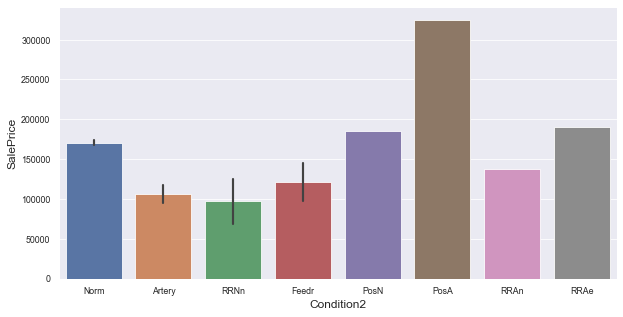

Dado que se tiene un p-value de 0.018055310973161504, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Condition2


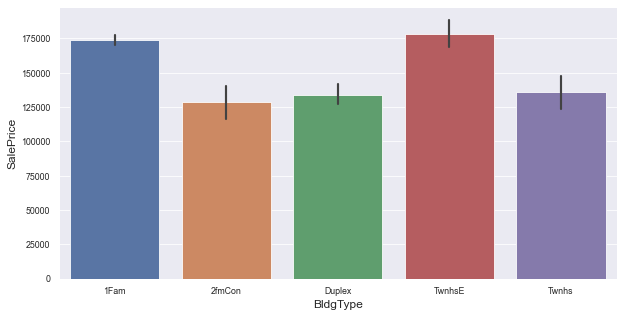

Dado que se tiene un p-value de 1.6230525329372655e-11, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por BldgType


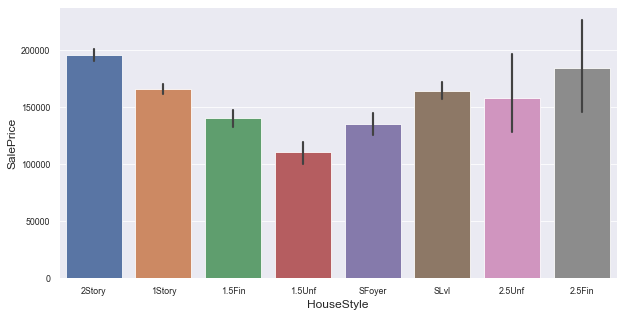

Dado que se tiene un p-value de 2.8090564313383625e-30, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por HouseStyle


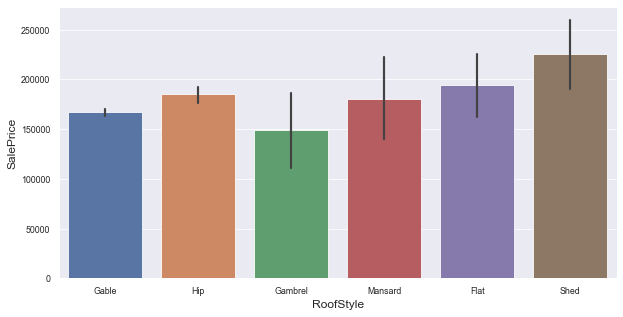

Dado que se tiene un p-value de 0.00015202553006596635, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por RoofStyle


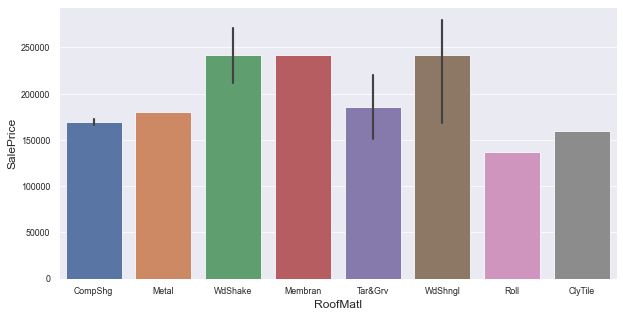

Dado que se tiene un p-value de 0.04570939279524747, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por RoofMatl


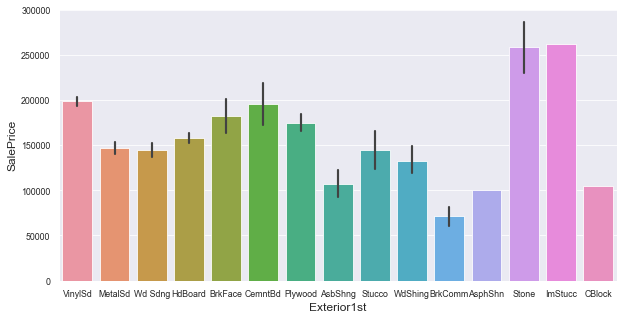

Dado que se tiene un p-value de 1.018879594220751e-51, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Exterior1st


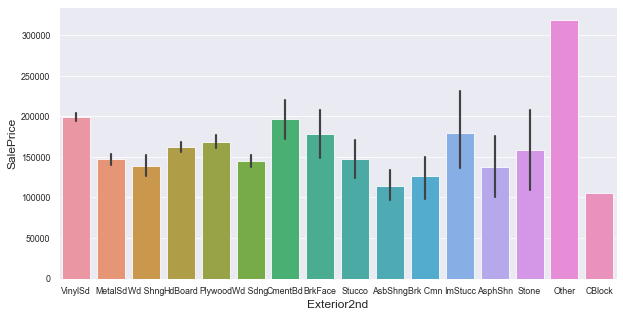

Dado que se tiene un p-value de 1.799787281473349e-46, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Exterior2nd


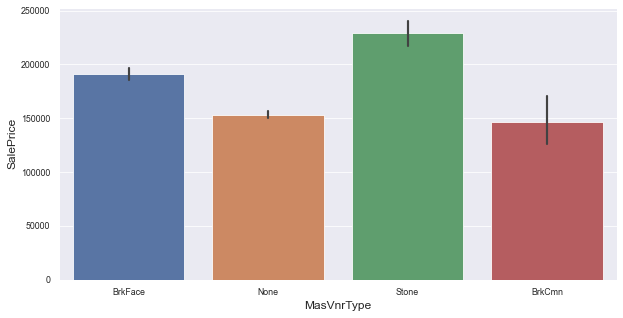

Dado que se tiene un p-value de 8.986748931496686e-54, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por MasVnrType


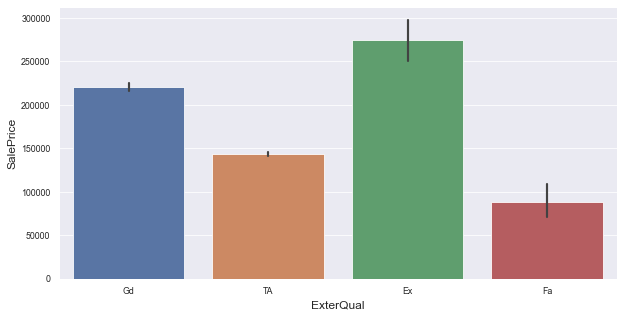

Dado que se tiene un p-value de 6.0476546661711415e-174, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por ExterQual


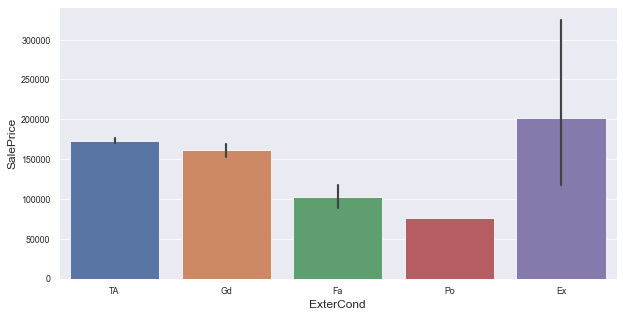

Dado que se tiene un p-value de 1.8733000547624446e-09, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por ExterCond


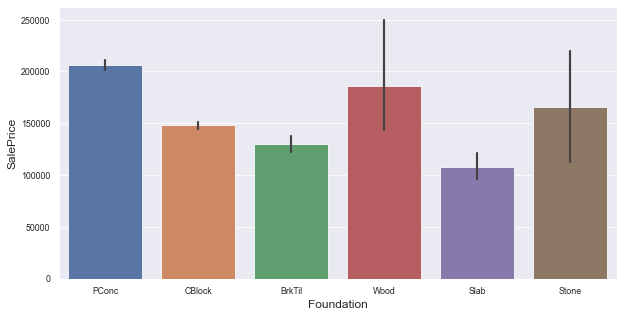

Dado que se tiene un p-value de 4.892996023138723e-100, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Foundation


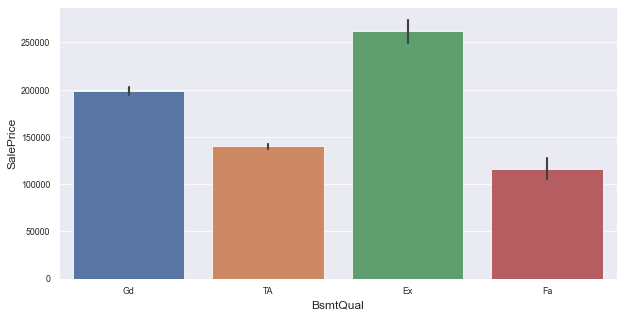

Dado que se tiene un p-value de 1.290559306283273e-142, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por BsmtQual


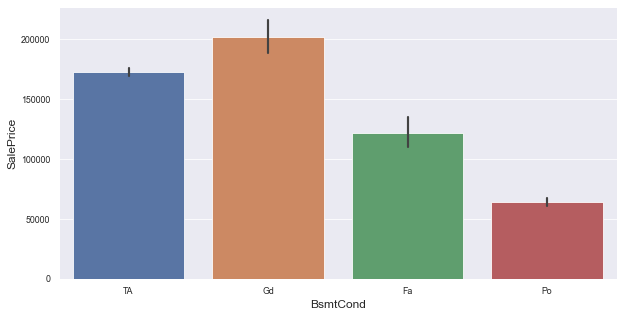

Dado que se tiene un p-value de 3.734612161706855e-12, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por BsmtCond


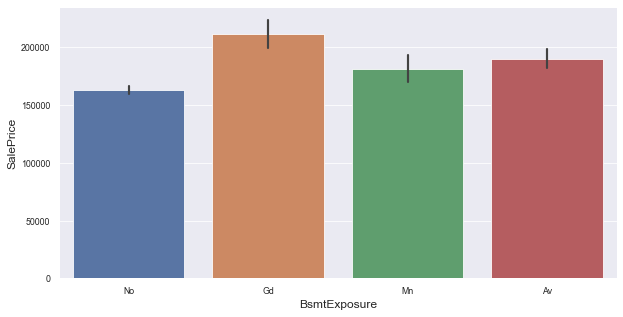

Dado que se tiene un p-value de 2.108558563270076e-20, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por BsmtExposure


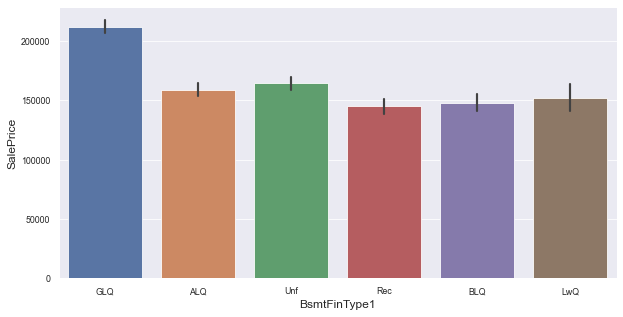

Dado que se tiene un p-value de 1.2797355859599207e-56, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por BsmtFinType1


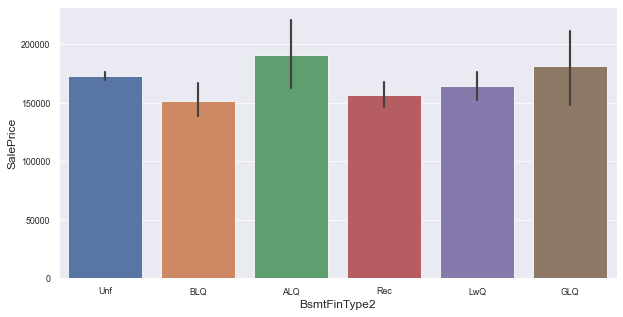

Dado que se tiene un p-value de 0.04752034303235628, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por BsmtFinType2


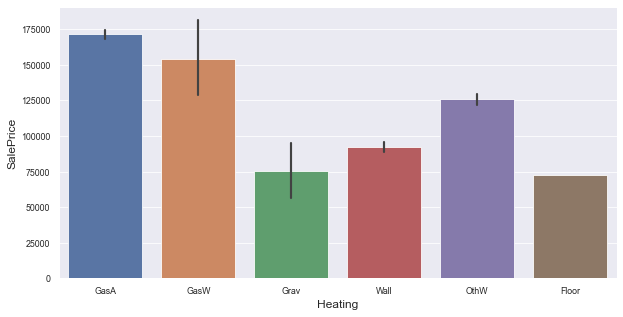

Dado que se tiene un p-value de 1.0763824075816104e-05, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Heating


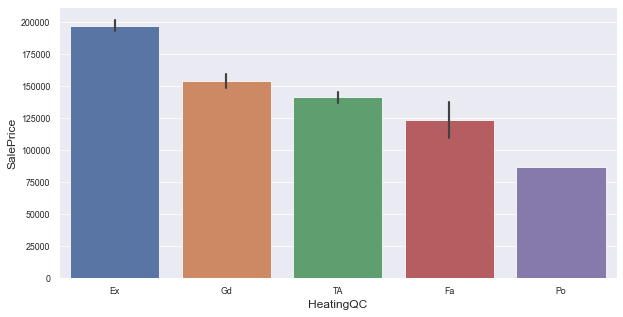

Dado que se tiene un p-value de 5.965535528491924e-70, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por HeatingQC


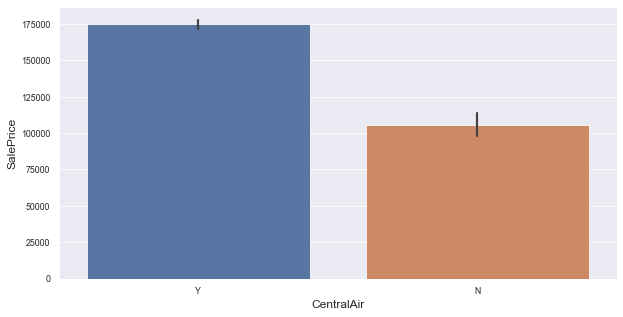

Dado que se tiene un p-value de 1.0427007389621014e-29, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por CentralAir


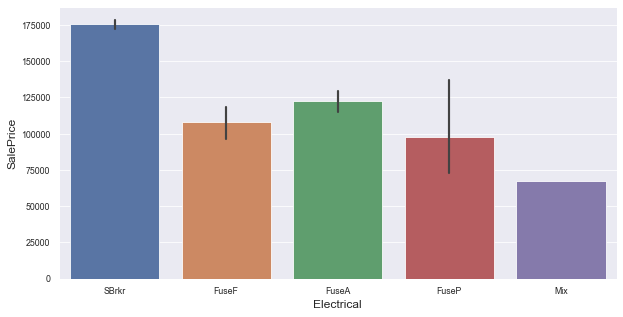

Dado que se tiene un p-value de 1.4699082779889606e-23, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Electrical


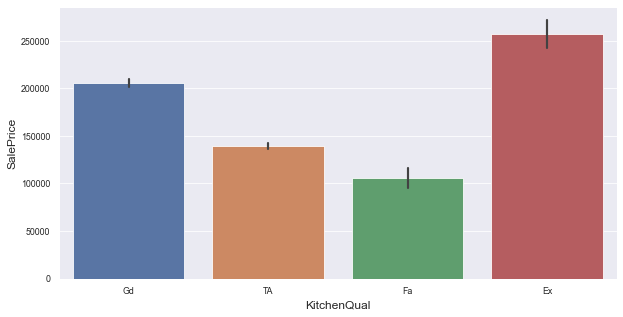

Dado que se tiene un p-value de 1.0331704421341158e-160, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por KitchenQual


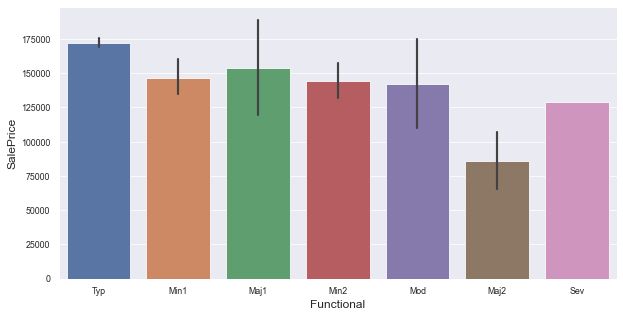

Dado que se tiene un p-value de 8.377356649908461e-05, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por Functional


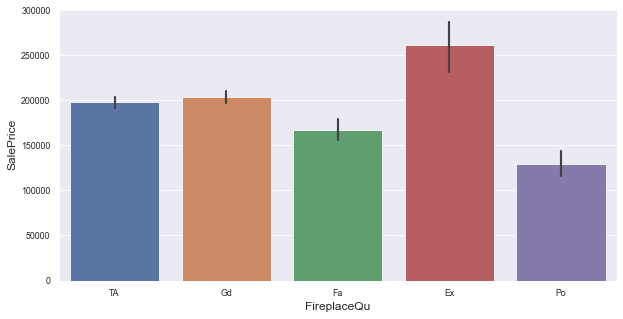

Dado que se tiene un p-value de 7.979979139092629e-12, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por FireplaceQu


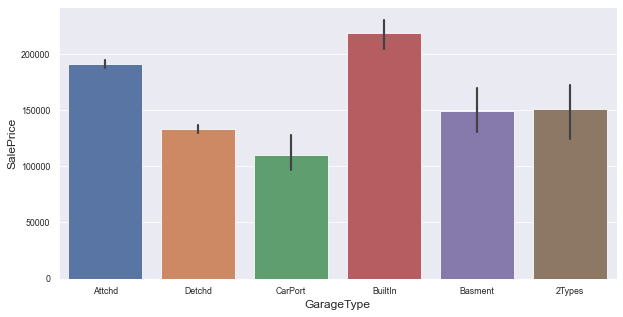

Dado que se tiene un p-value de 7.29510374360012e-77, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por GarageType


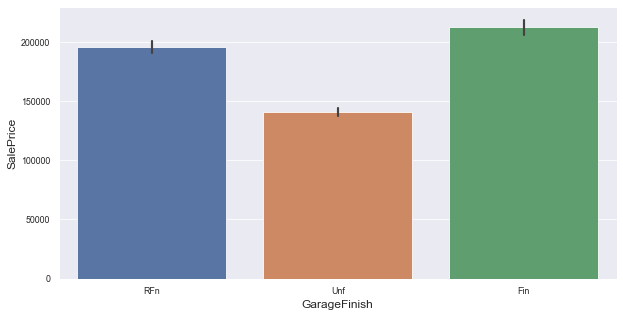

Dado que se tiene un p-value de 2.462452843109282e-99, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por GarageFinish


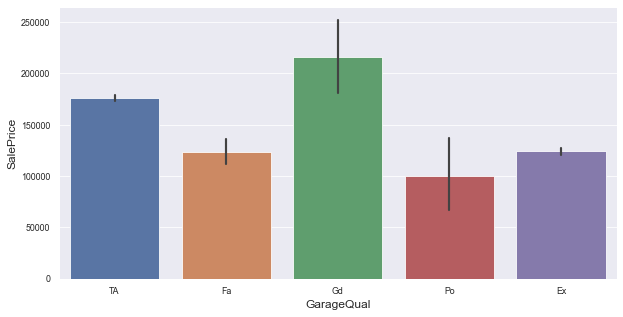

Dado que se tiene un p-value de 1.1647867704050652e-10, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por GarageQual


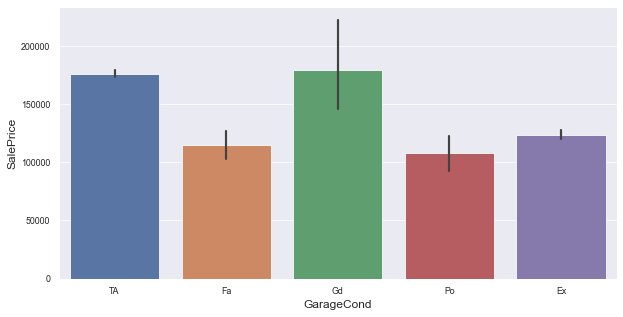

Dado que se tiene un p-value de 3.525898044063014e-10, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por GarageCond


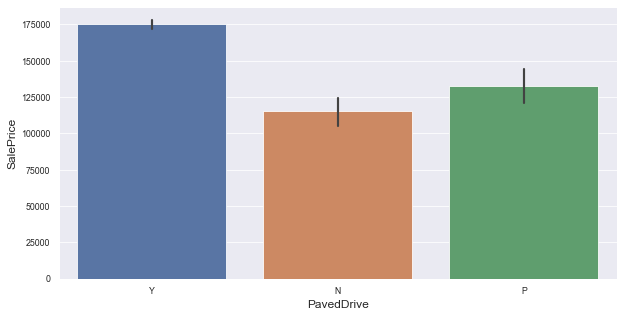

Dado que se tiene un p-value de 6.372187172239493e-23, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por PavedDrive


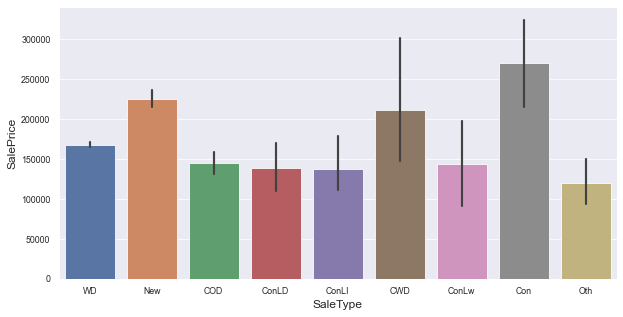

Dado que se tiene un p-value de 2.261943813513021e-19, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por SaleType


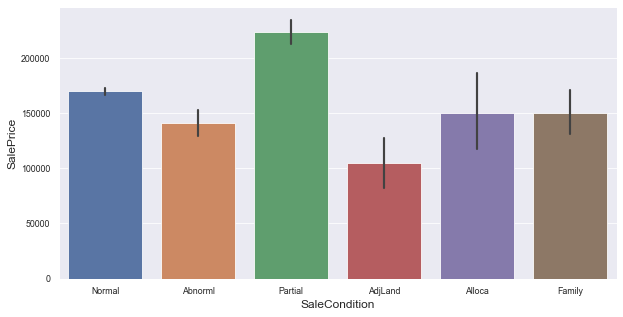

Dado que se tiene un p-value de 1.3908062047666767e-22, se rechaza la hipótesis nula con 95.0% de confianza, concluyendo que SalePrice difiere por SaleCondition


In [133]:
# Para cada una de las caracteristicas del dataset se realiza una prueba de hipótesis para ver si son significativas.
# Es decir:
# H_0 : mu_1 = mu_2 = ... = mu_n
# H_1 : al menos una de las medias es distinta

# definimos una lista vacía para guardar las variables con media significativamente distinta por grupo.
lst_1 = []
# definimos una lista vacía para guardar las variables con media no significativamente distinta por grupo.
lst_0 = []
for feature in features:
    test = features_test('SalePrice',feature,0.05)
    if test:
        lst_1.append(feature)
    else:
        lst_0.append(feature)
    

In [134]:
# Revisa las caracteristicas con medias no significativas
lst_0

['Street', 'Utilities', 'LandSlope']

In [135]:
# Y eliminamos dichas columnas del dataset
houses = houses.drop(lst_0,axis=1)
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


Revisión de correlaciones con variables númericas

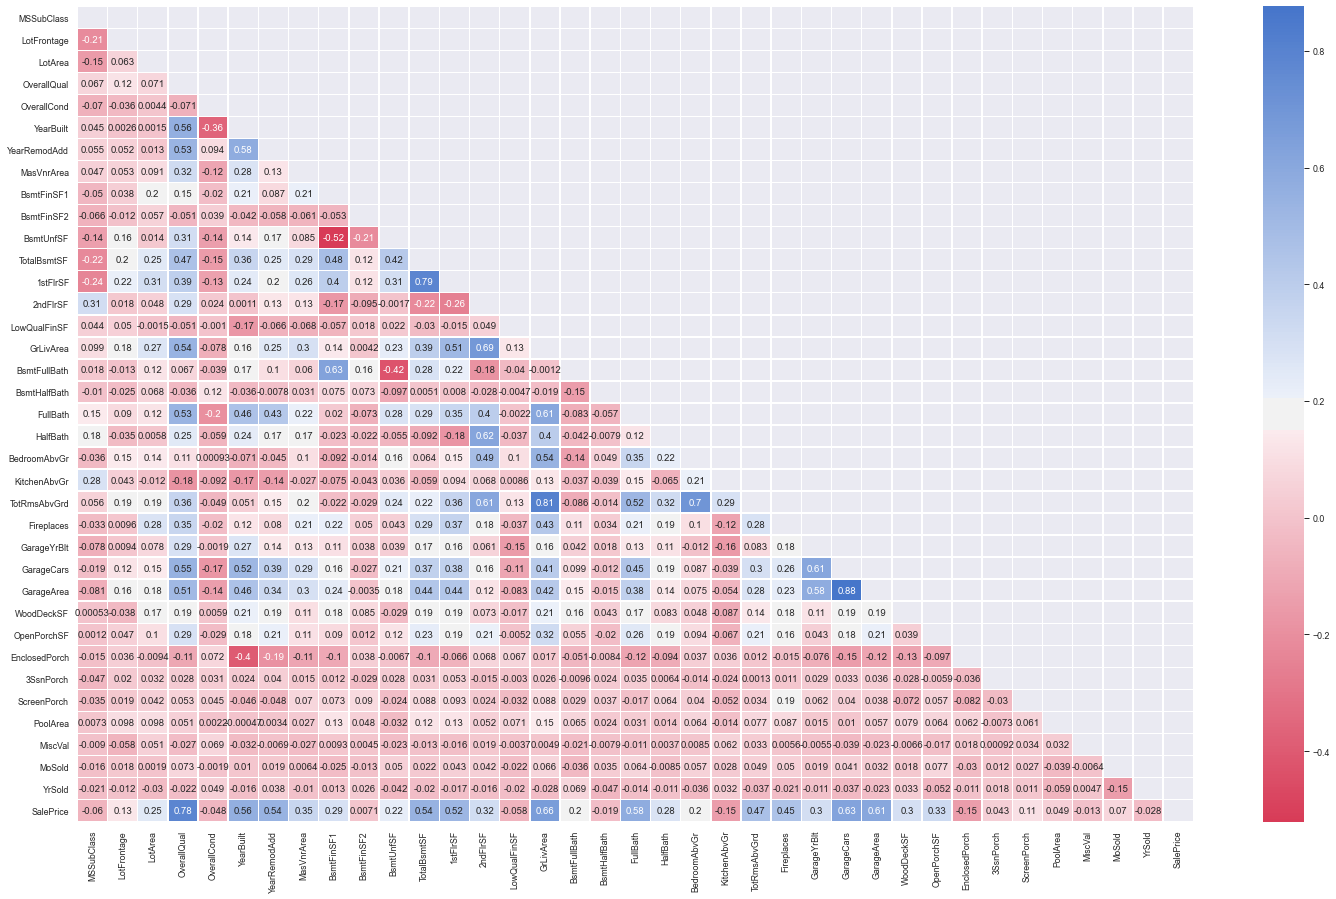

In [136]:
# Asigna formato y tamaño de gráfica 
sns.set(context = 'paper', style = 'darkgrid', rc={'figure.figsize':(25, 15)})

#Quita la esquina superior del Heatmap
#Zero_like convierte los valores de la matriz de correlación en ceros y el dtype los convierte a booleanos
mask = np.zeros_like(houses.corr(),dtype=np.bool)
#triu_indices_from regresa los valores del triangulo superior de la matriz
mask[np.triu_indices_from(mask)] = True
#asignar paleta de colores (colores HUSL)
cmap = sns.diverging_palette(6,255, as_cmap =  True)

sns.heatmap(houses.corr(),mask = mask, cmap = cmap, linewidths=0.5,annot= True);

De la matriz de correlaciones podemos observar que las variables con mayor correlación con el precio de venta son
OverallQual,GrLivArea, GarageCars, GarageArea, FullBath, YearBuilt, TotalBsmtSF, YearRemodAdd y tstFlrSF

In [137]:
# Slecciona quellas variables que no tienen correlación mayor a 0.25 absoluta con el precio de venta
elimina = houses.corr()['SalePrice']

elimina = elimina[(elimina>=-0.25)&(elimina<=0.25)]
# Genera una lista para eliminar dichas variables
elimina = list(elimina.index)

In [138]:
# Elimina las variables
houses = houses.drop(elimina,axis=1)
houses.shape

(1398, 55)

In [139]:
# Tranforma las caracteristicas a columnas 
houses_dummies = pd.get_dummies(houses)
houses_dummies.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,196.0,706,856,856,854,1710,2,...,0,0,0,1,0,0,0,0,1,0
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,...,0,0,0,1,0,0,0,0,1,0
2,7,2001,2002,162.0,486,920,920,866,1786,2,...,0,0,0,1,0,0,0,0,1,0
3,7,1915,1970,0.0,216,756,961,756,1717,1,...,0,0,0,1,1,0,0,0,0,0
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,...,0,0,0,1,0,0,0,0,1,0


In [140]:
# Generamos la matriz de correlación
houses_dummies.corr()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
OverallQual,1.000000,0.562205,0.533183,0.323892,0.151497,0.465997,0.387914,0.290454,0.538011,0.533863,...,-0.017958,0.252036,-0.059719,-0.151251,-0.098352,-0.041126,-0.055742,-0.017316,-0.074783,0.248372
YearBuilt,0.562205,1.000000,0.578700,0.280665,0.212800,0.357267,0.241387,0.001117,0.163581,0.461108,...,-0.021682,0.312640,0.014345,-0.194998,-0.105172,-0.044746,0.002806,-0.031952,-0.119943,0.309186
YearRemodAdd,0.533183,0.578700,1.000000,0.127259,0.087348,0.253352,0.195091,0.132225,0.254492,0.425901,...,-0.038416,0.293045,-0.009825,-0.137929,-0.130129,-0.039016,-0.023703,-0.044289,-0.080048,0.289889
MasVnrArea,0.323892,0.280665,0.127259,1.000000,0.212922,0.289352,0.260914,0.126079,0.297795,0.215234,...,-0.021296,0.069542,-0.026155,-0.053371,-0.026152,-0.009182,-0.003951,-0.000976,-0.024549,0.067006
BsmtFinSF1,0.151497,0.212800,0.087348,0.212922,1.000000,0.481959,0.395307,-0.167467,0.141325,0.020056,...,-0.015757,-0.047385,0.014406,0.045803,-0.021039,-0.012931,0.029983,0.008149,0.037538,-0.045509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.041126,-0.044746,-0.039016,-0.009182,-0.012931,-0.057296,-0.036896,-0.014017,-0.040349,-0.003995,...,-0.003209,-0.014135,-0.002484,0.019325,-0.014868,1.000000,-0.004770,-0.006453,-0.121029,-0.014382
SaleCondition_Alloca,-0.055742,0.002806,-0.023703,-0.003951,0.029983,-0.045092,0.068528,-0.037521,0.016979,0.015969,...,-0.005335,-0.023499,-0.004130,0.032128,-0.024718,-0.004770,1.000000,-0.010729,-0.201209,-0.023910
SaleCondition_Family,-0.017316,-0.031952,-0.044289,-0.000976,0.008149,0.031259,0.034432,-0.025706,0.001624,0.002230,...,-0.007218,-0.031789,-0.005587,0.024593,-0.033439,-0.006453,-0.010729,1.000000,-0.272195,-0.032346
SaleCondition_Normal,-0.074783,-0.119943,-0.080048,-0.024549,0.037538,-0.110795,-0.106403,0.050994,-0.036652,-0.073149,...,0.026517,-0.596173,-0.104776,0.591093,-0.627122,-0.121029,-0.201209,-0.272195,1.000000,-0.606617


In [141]:
# Slecciona quellas variables que no tienen correlación mayor a 0.25 absoluta con el precio de venta
elimina = houses_dummies.corr()['SalePrice']

elimina = elimina[(elimina>=-0.25)&(elimina<=0.25)]
# Genera una lista para eliminar dichas variables
elimina = list(elimina.index)

In [142]:
# Elimina las variables
houses_2 = houses_dummies.drop(elimina,axis=1)
houses_2.shape

(1398, 55)

Regresión Lineal para estimar el precio de venta.

In [162]:
# Define el intercepto
X = sm.add_constant(houses_2.drop('SalePrice',axis=1))
Y = houses_2.SalePrice

In [164]:
# Genera modelo y predicciones
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

In [166]:
#imprime los resultados del modelo
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:09:41   Log-Likelihood:                -16071.
No. Observations:                1398   AIC:                         3.225e+04
Df Residuals:                    1344   BIC:                         3.253e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.906e+05 

**CONCLUSIONES** 

La r-cuadrada es 0.839. Esto significa que el modelo captura el 83.9% de las variaciones de los datos.

El p-value es cero, esto significa que la pendiente es significativamente distinta de cero.

Gráficamente se observa el ajuste del modelo a los datos, con algunas diferencias mayores.

In [198]:
# Genera un DF con la comparación original y la predicción
df_final = pd.DataFrame({'observed':houses_2.SalePrice,'predicted':predictions})

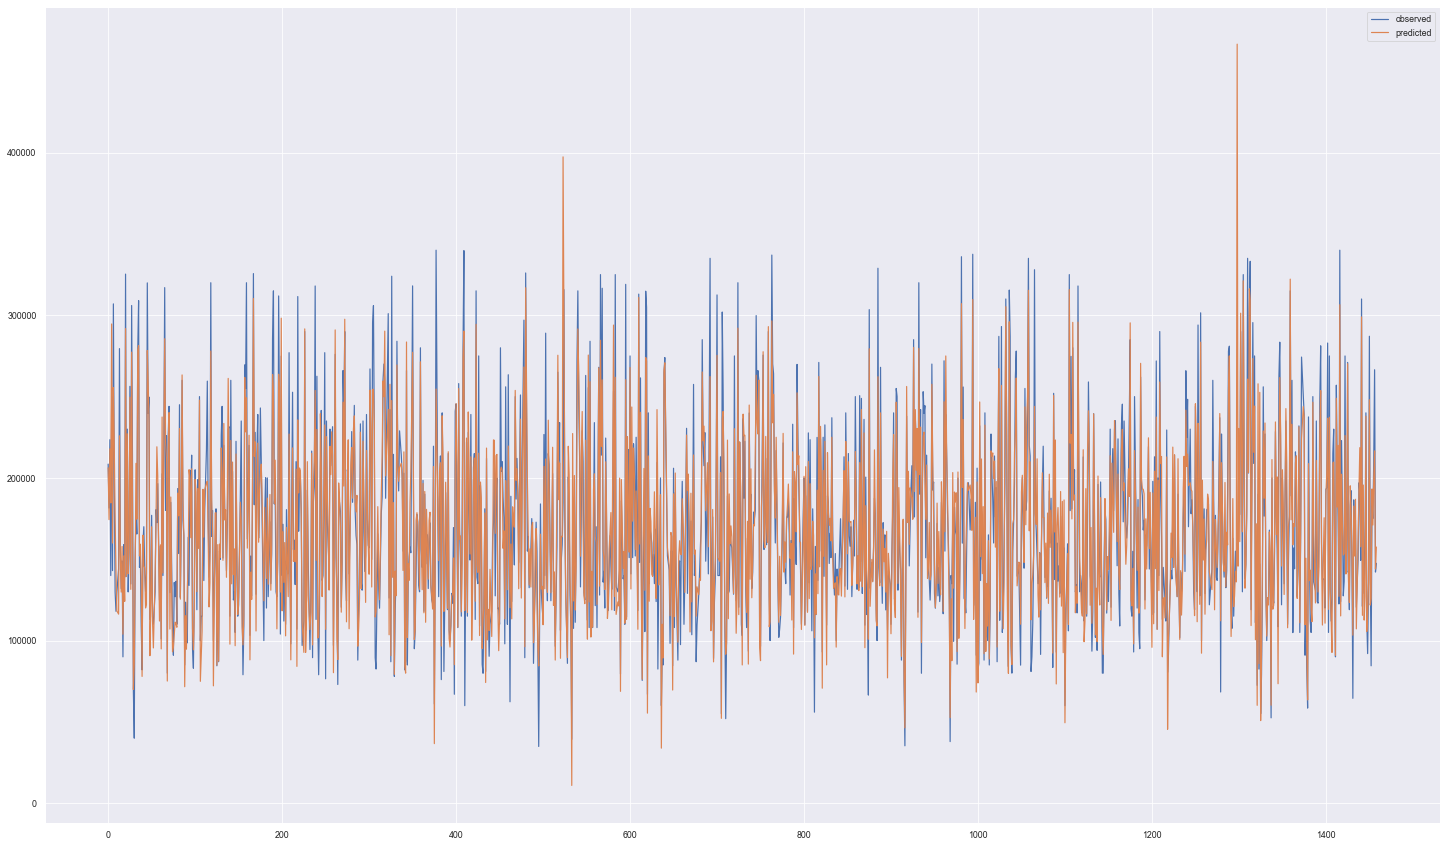

In [199]:
df_final.plot()